In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('Data/Mg.xlsx')
data.head()

,SrNo,SiteFeature,AttributeOrParameter,StationOrSiteName,PeriodOrDateofMeasurment,Mg,SampleSource,SampleDepth
0,0,Surface Water,Mg,Ambegaon,2011-07-20 13:45:00,9.720,River,30.0
1,1,Surface Water,Mg,Ambegaon,2011-09-19 15:10:00,18.468,River,30.0
2,2,Surface Water,Mg,Ambegaon,2011-10-12 14:30:00,18.468,River,30.0
3,3,Surface Water,Mg,Ambegaon,2012-06-25 15:10:00,10.692,River,30.0
4,4,Surface Water,Mg,Ambegaon,2012-08-16 14:40:00,3.888,River,30.0


In [3]:
data.SiteFeature.unique()

array(['Surface Water'], dtype=object)

In [4]:
data.SampleDepth.unique()

array([30., nan])

In [5]:
data.StationOrSiteName.unique()

array(['Ambegaon', 'Ambeghar', 'Chaskman', 'Dattawadi', 'Daund',
       'Khadakwasla Reservoir', 'Khamgaon', 'Narsinhpur', 'Nighoje',
       'Panshet Reservoir', 'Paud', 'Pavana Reservoir', 'Pimpale Gurav',
       'Rakshewadi'], dtype=object)

In [6]:
data.SampleSource.unique()

array(['River', 'Reservoir'], dtype=object)

In [7]:
#dropping Features having only unique or same value
data.drop(['SrNo','AttributeOrParameter','SiteFeature','SampleDepth'],axis=1,inplace=True)

In [8]:
data.columns=['Station','Period','Mg','SampleSource']

In [9]:
data.head()

,Station,Period,Mg,SampleSource
0,Ambegaon,2011-07-20 13:45:00,9.720,River
1,Ambegaon,2011-09-19 15:10:00,18.468,River
2,Ambegaon,2011-10-12 14:30:00,18.468,River
3,Ambegaon,2012-06-25 15:10:00,10.692,River
4,Ambegaon,2012-08-16 14:40:00,3.888,River


In [10]:
data=data.sort_values(by=['Period'])
x=np.arange(916)
data.index=x

In [11]:
data.head(10)

,Station,Period,Mg,SampleSource
0,Khamgaon,2011-01-06 13:00:00,26.243999,River
1,Dattawadi,2011-01-10 11:20:00,12.636000,River
2,Paud,2011-01-10 13:40:00,4.860000,River
3,Daund,2011-01-12 12:10:00,44.712002,River
4,Narsinhpur,2011-01-15 12:00:00,40.824001,River
5,Ambeghar,2011-01-18 13:15:00,6.804000,River
6,Chaskman,2011-01-27 14:45:00,16.524000,River
7,Pimpale Gurav,2011-01-29 13:30:00,11.664000,River
8,Nighoje,2011-01-29 15:20:00,23.327999,River
9,Ambeghar,2011-02-03 12:30:00,3.888000,River


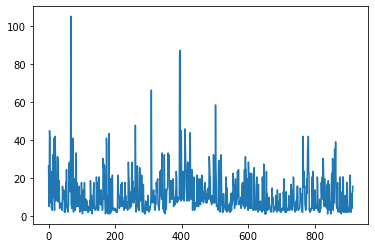

In [12]:
plt.plot(data['Mg'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Station       916 non-null    object        
 1   Period        916 non-null    datetime64[ns]
 2   Mg            916 non-null    float64       
 3   SampleSource  916 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 35.8+ KB


In [14]:
data.shape

(916, 4)

In [15]:
data.Station.value_counts()

Khamgaon                 118
Khadakwasla Reservoir    117
Pavana Reservoir         115
Panshet Reservoir        115
Ambeghar                 106
Paud                      75
Chaskman                  73
Daund                     68
Ambegaon                  50
Rakshewadi                36
Narsinhpur                32
Nighoje                    5
Dattawadi                  4
Pimpale Gurav              2
Name: Station, dtype: int64

In [16]:
data.replace(['Pimpale Gurav','Dattawadi','Nighoje','Narsinhpur','Rakshewadi'], 'Others',inplace=True)

In [17]:
data.head()

,Station,Period,Mg,SampleSource
0,Khamgaon,2011-01-06 13:00:00,26.243999,River
1,Others,2011-01-10 11:20:00,12.636000,River
2,Paud,2011-01-10 13:40:00,4.860000,River
3,Daund,2011-01-12 12:10:00,44.712002,River
4,Others,2011-01-15 12:00:00,40.824001,River


In [18]:
data.Station.value_counts()

Khamgaon                 118
Khadakwasla Reservoir    117
Pavana Reservoir         115
Panshet Reservoir        115
Ambeghar                 106
Others                    79
Paud                      75
Chaskman                  73
Daund                     68
Ambegaon                  50
Name: Station, dtype: int64

In [19]:
data.SampleSource.value_counts()

River        571
Reservoir    345
Name: SampleSource, dtype: int64

In [20]:
#One hot EnMging
data=pd.get_dummies(data,columns=['Station','SampleSource'],drop_first=True)

In [21]:
data.head()

,Period,Mg,Station_Ambeghar,Station_Chaskman,Station_Daund,Station_Khadakwasla Reservoir,Station_Khamgaon,Station_Others,Station_Panshet Reservoir,Station_Paud,Station_Pavana Reservoir,SampleSource_River
0,2011-01-06 13:00:00,26.243999,0,0,0,0,1,0,0,0,0,1
1,2011-01-10 11:20:00,12.636000,0,0,0,0,0,1,0,0,0,1
2,2011-01-10 13:40:00,4.860000,0,0,0,0,0,0,0,1,0,1
3,2011-01-12 12:10:00,44.712002,0,0,1,0,0,0,0,0,0,1
4,2011-01-15 12:00:00,40.824001,0,0,0,0,0,1,0,0,0,1


In [22]:
# Handling DateTime
data['Date']=data['Period'].dt.day
data['Month']=data['Period'].dt.month
data['Year']=data['Period'].dt.year
data.drop('Period',axis=1,inplace=True)

In [23]:
data.head()

,Mg,Station_Ambeghar,Station_Chaskman,Station_Daund,Station_Khadakwasla Reservoir,Station_Khamgaon,Station_Others,Station_Panshet Reservoir,Station_Paud,Station_Pavana Reservoir,SampleSource_River,Date,Month,Year
0,26.243999,0,0,0,0,1,0,0,0,0,1,6,1,2011
1,12.636000,0,0,0,0,0,1,0,0,0,1,10,1,2011
2,4.860000,0,0,0,0,0,0,0,1,0,1,10,1,2011
3,44.712002,0,0,1,0,0,0,0,0,0,1,12,1,2011
4,40.824001,0,0,0,0,0,1,0,0,0,1,15,1,2011


In [24]:
data.columns=['Mg', 'Ambeghar', 'Chaskman', 'Daund',
       'Khadakwasla_Reservoir', 'Khamgaon', 'Others',
       'Panshet_Reservoir', 'Paud', 'Pavana_Reservoir',
       'River', 'Date', 'Month', 'Year']

In [25]:
data=data[['Date', 'Month', 'Year','Ambeghar', 'Chaskman', 'Daund',
       'Khadakwasla_Reservoir', 'Khamgaon', 'Others',
       'Panshet_Reservoir', 'Paud', 'Pavana_Reservoir',
       'River','Mg']]

In [26]:
data.head()

,Date,Month,Year,Ambeghar,Chaskman,Daund,Khadakwasla_Reservoir,Khamgaon,Others,Panshet_Reservoir,Paud,Pavana_Reservoir,River,Mg
0,6,1,2011,0,0,0,0,1,0,0,0,0,1,26.243999
1,10,1,2011,0,0,0,0,0,1,0,0,0,1,12.636000
2,10,1,2011,0,0,0,0,0,0,0,1,0,1,4.860000
3,12,1,2011,0,0,1,0,0,0,0,0,0,1,44.712002
4,15,1,2011,0,0,0,0,0,1,0,0,0,1,40.824001


In [27]:
data.corr()

,Date,Month,Year,Ambeghar,Chaskman,Daund,Khadakwasla_Reservoir,Khamgaon,Others,Panshet_Reservoir,Paud,Pavana_Reservoir,River,Mg
Date,1.000000,0.079456,0.039521,0.027659,0.082769,0.074858,-0.076699,0.010704,0.072433,-0.075330,-0.060839,-0.063014,0.148056,0.121457
Month,0.079456,1.000000,-0.084850,-0.070877,0.016942,0.119496,-0.015185,-0.021571,0.051393,-0.015045,-0.038182,-0.015045,0.032879,0.141637
Year,0.039521,-0.084850,1.000000,-0.009269,0.084052,-0.074914,0.015468,0.008263,-0.095444,0.008587,-0.000559,0.008587,-0.024217,-0.118812
Ambeghar,0.027659,-0.070877,-0.009269,1.000000,-0.106453,-0.102439,-0.138430,-0.139107,-0.111138,-0.137070,-0.108030,-0.137070,0.281191,-0.182008
Chaskman,0.082769,0.016942,0.084052,-0.106453,1.000000,-0.083331,-0.112607,-0.113159,-0.090406,-0.111501,-0.087878,-0.111501,0.228738,0.094927
Daund,0.074858,0.119496,-0.074914,-0.102439,-0.083331,1.000000,-0.108362,-0.108892,-0.086998,-0.107297,-0.084565,-0.107297,0.220114,0.433223
Khadakwasla_Reservoir,-0.076699,-0.015185,0.015468,-0.138430,-0.112607,-0.108362,1.000000,-0.147150,-0.117563,-0.144995,-0.114275,-0.144995,-0.492298,-0.202550
Khamgaon,0.010704,-0.021571,0.008263,-0.139107,-0.113159,-0.108892,-0.147150,1.000000,-0.118138,-0.145704,-0.114834,-0.145704,0.298904,0.344194
Others,0.072433,0.051393,-0.095444,-0.111138,-0.090406,-0.086998,-0.117563,-0.118138,1.000000,-0.116408,-0.091745,-0.116408,0.238804,0.251738
Panshet_Reservoir,-0.075330,-0.015045,0.008587,-0.137070,-0.111501,-0.107297,-0.144995,-0.145704,-0.116408,1.000000,-0.113153,-0.143571,-0.480663,-0.222284


In [28]:
X=data.drop('Mg',axis=1)
Y=data['Mg']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import math

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
regressor.fit(x_train, y_train)
pred=regressor.predict(x_test)
print('RMSE : ',math.sqrt(mean_squared_error(y_test,pred)))
print('R2 : ',(r2_score(y_test,pred)*100))

RMSE :  8.490008437466486
R2 :  43.71056880368798


In [31]:
parameter=pd.read_excel('Input/Input.xlsx')
Mg=regressor.predict(parameter)
Mg=pd.DataFrame(Mg)
Mg.columns=['Mg']
output=pd.concat([parameter,Mg],axis=1)
output.to_csv('Output/Output_Mg.csv')